# Credit Card Fraud Detection
Dealing with imbalanced datasets

Detect analomoies which can indicate possibly fradulant charges in credit card transaction data. 

https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

### Load packages

In [161]:
import pandas as pd 
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.figure_factory as ff
from plotly.offline import plot, iplot
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest

# from sklearn.neighbors import LocalOutlierFactor
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from catboost import CatBoostClassifier
# from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

import gc
import os
import time
from datetime import datetime 
pd.set_option('display.max_columns', 32)
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)

### Read data

In [86]:
df = pd.read_csv("D:\\NETDrive\\GitHub\\creditcard.csv")
df_copy = df.copy()

### EDA

In [87]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
df.head()
# It contains only numerical input variables which are the result of a PCA transformation. 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [91]:
df.Class.value_counts()/len(df) 
# The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions

0    0.998273
1    0.001727
Name: Class, dtype: float64

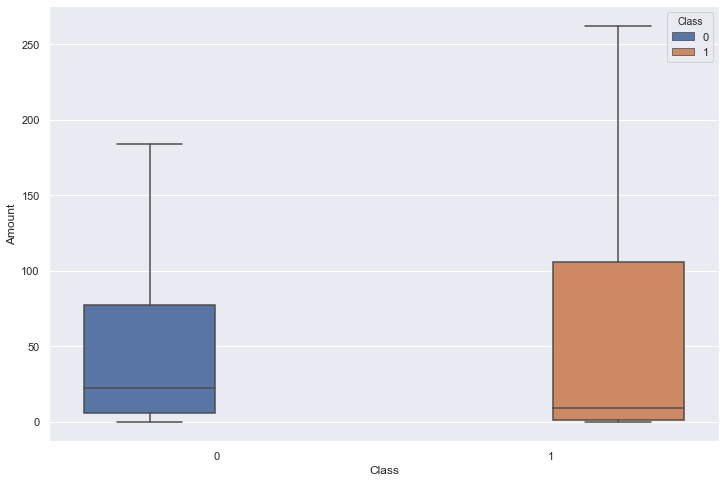

In [92]:
# Box plot of Amounts by class
plt.figure(figsize=(12,8))
sns.boxplot(x="Class", y="Amount", hue="Class",data=df, showfliers=False)
plt.show();

In [93]:
# Stats of transaction amounts by class
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
print("**********  Stats of real transaction amounts  **********")
print(class_0.describe())
print("**********  Stats of fraudulent transaction amounts  **********")
print(class_1.describe())

**********  Stats of real transaction amounts  **********
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
**********  Stats of fraudulent transaction amounts  **********
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [146]:
# Transactions Time Density Plot
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
class_all = df['Time']
hist_data = [class_0, class_1, class_all]
group_labels = ['Genuine', 'Fraudulent', 'All']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Transactions Time Density', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')
# Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
# This dataset presents transactions that occurred in two days (60*60*48 = 172,800 seconds)

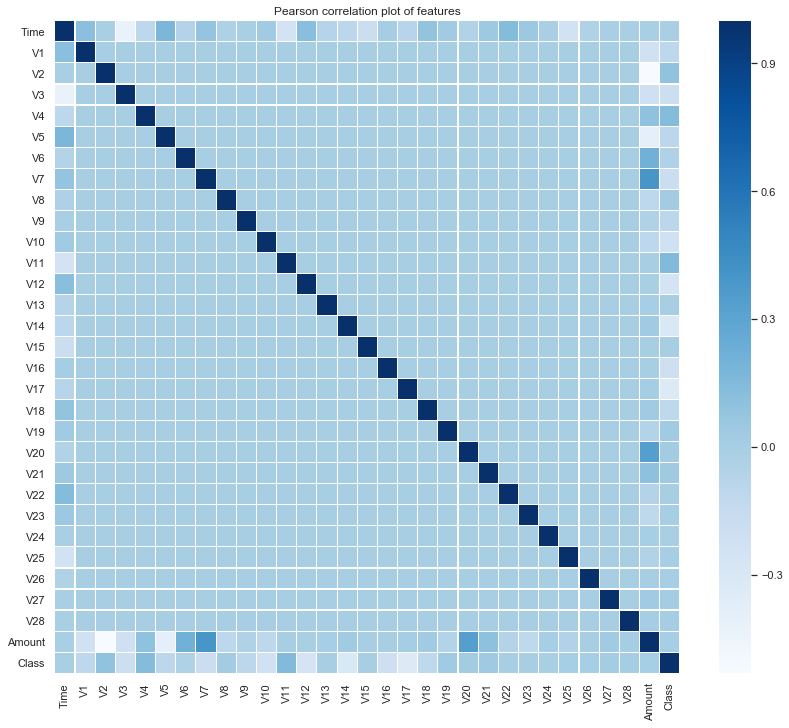

In [95]:
plt.figure(figsize = (14,12))
plt.title('Pearson correlation plot of features')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()
# No notable correlation between features V1-V28. 
# Certain correlations between Time and some features (inverse correlation with V3) 
# Certain correlations between Amount and some features (positive with V7, V20, negative with V1 and V5).

<Figure size 432x288 with 0 Axes>

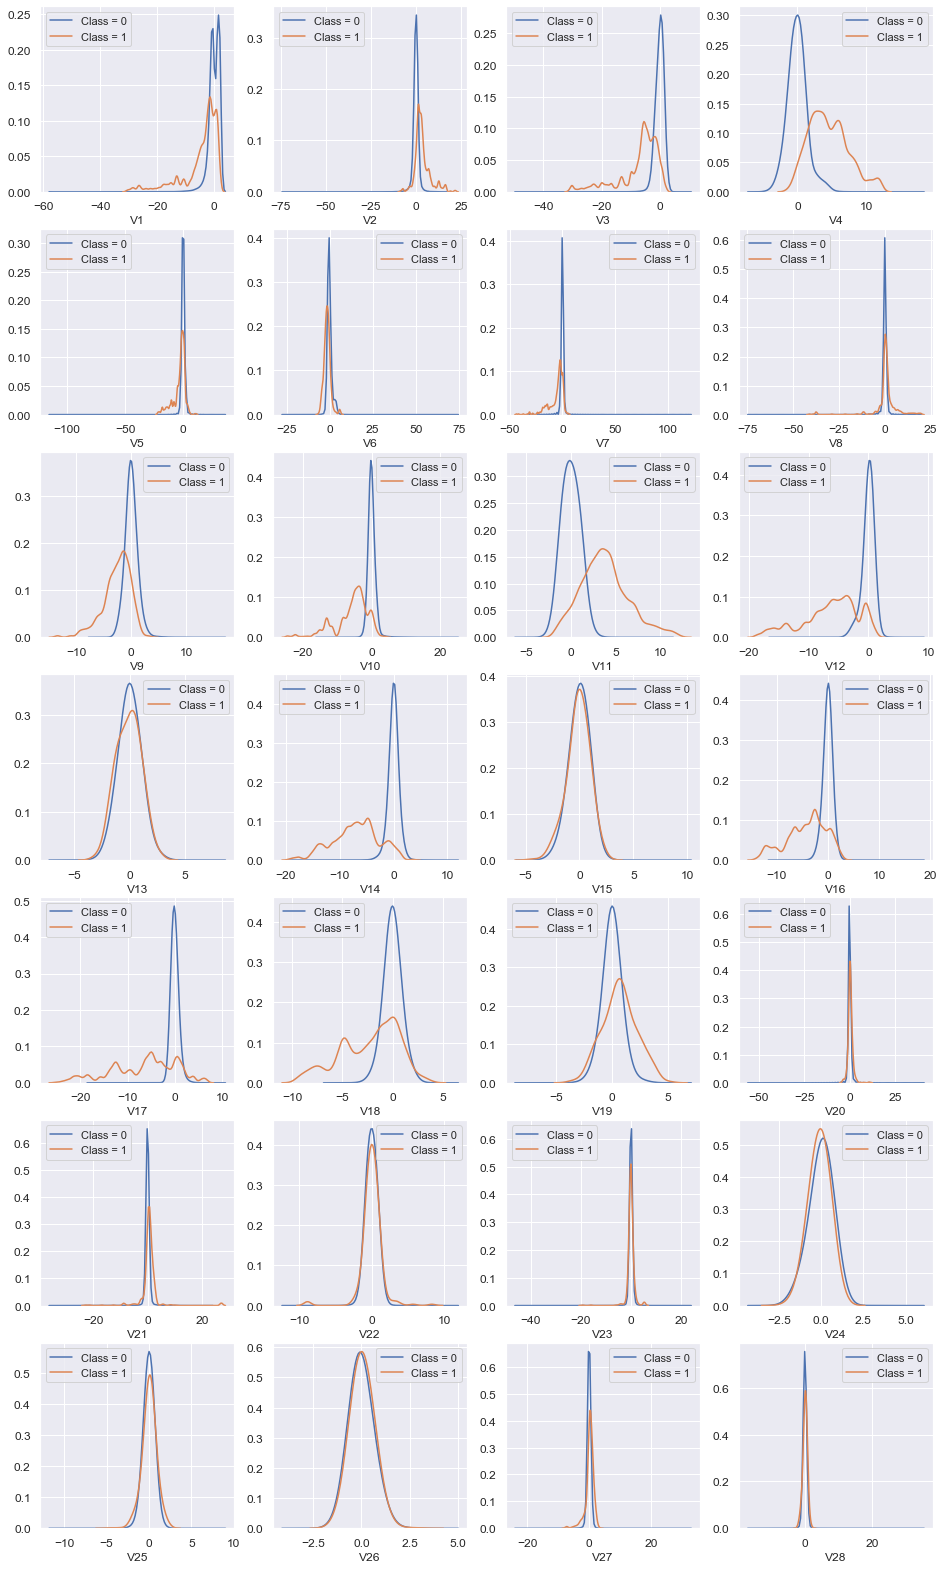

In [96]:
# Feature distributions by Class
var = np.delete(df.columns.values, [0, 29, 30])
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
plt.figure();
fig, ax = plt.subplots(8,4,figsize=(16,28));
i = 0
for feature in var:
    i += 1
    plt.subplot(7,4,i);
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)    
plt.show();

# For some of the features we can observe a good selectivity in terms of distribution for values of Class
# In general, the features distribution for legitimate transactions is centered around 0, 
# sometime with a long queue at one of the extremities. 
# While, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

In [97]:
target = 'Class'
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
# features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
#        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
#        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
#        'Amount']

### Splite dataset into train/validation/test

In [98]:
# Splite dataset
VALID_SIZE = 0.20 
TEST_SIZE = 0.20 
RANDOM_STATE = 2020
train_df1, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)
train_df, valid_df = train_test_split(train_df1, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

In [99]:
len(test_df[test_df['Class']==1])

93

### Random Forest Model

In [100]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

In [101]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [102]:
time_start = time.time()
clf.fit(train_df1[features], train_df1[target].values)
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

training time: 66.08 seconds.


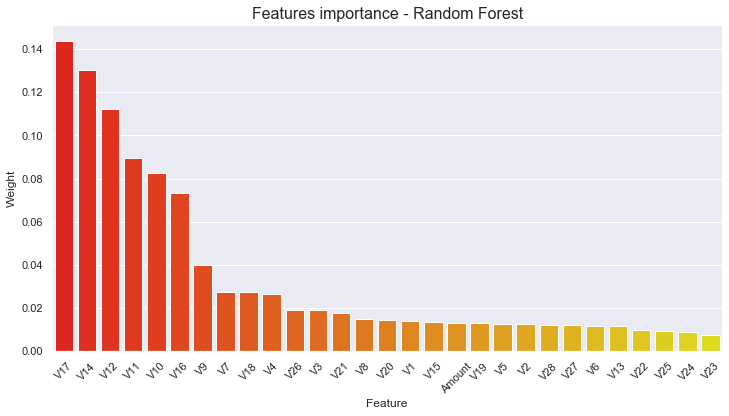

In [103]:
# Feature importance
tmp = pd.DataFrame({'Feature': features, 'Weight': clf.feature_importances_})
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - Random Forest',fontsize=16)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V17, V14, V12, V11, V10, V16.

In [104]:
preds = clf.predict(valid_df[features])

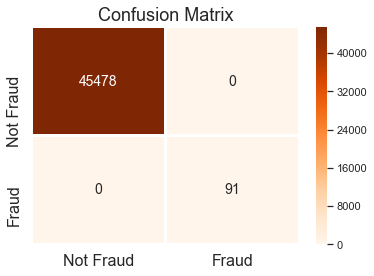

In [105]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [106]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

1.0

test dataset AUC - Random Forest:  0.903
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.89      0.81      0.85        93

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



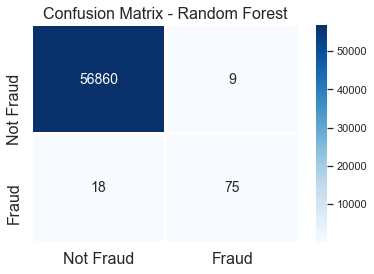

In [107]:
# Confusion Matrix
preds_tst = clf.predict(test_df[features])
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - Random Forest', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - Random Forest: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### AdaBoost Model

In [108]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=NUM_ESTIMATORS)

In [109]:
time_start = time.time()
clf.fit(train_df1[features], train_df1[target].values)
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

training time: 105.02 seconds.


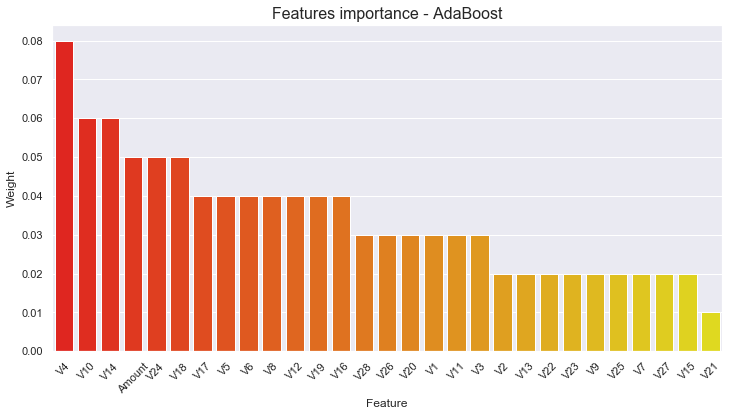

In [110]:
# Feature importance
tmp = pd.DataFrame({'Feature': features, 'Weight': clf.feature_importances_})
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - AdaBoost',fontsize=16)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V4, V10, V14, Amount, V24, V18.

In [111]:
preds = clf.predict(valid_df[features])

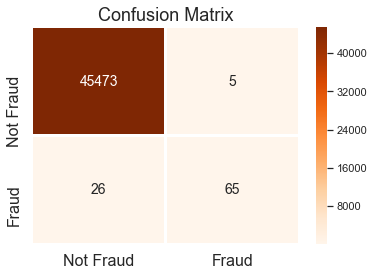

In [112]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [113]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

0.857

test dataset AUC - AdaBoost:  0.887
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.84      0.77      0.80        93

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



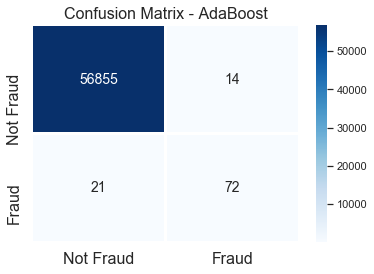

In [114]:
# Confusion Matrix
preds_tst = clf.predict(test_df[features])
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - AdaBoost', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - AdaBoost: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### Isolation Forest Model

In [115]:
OUTLIER_FRACTION=(df.Class.value_counts()/len(df))[1]

In [116]:
clf = IsolationForest(n_estimators=NUM_ESTIMATORS, 
                max_samples=len(df),
                contamination=OUTLIER_FRACTION,
                random_state=RANDOM_STATE, verbose=0)

In [117]:
clf.fit(df[features])

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.001727485630620034, max_features=1.0,
                max_samples=284807, n_estimators=100, n_jobs=None,
                random_state=2020, verbose=0, warm_start=False)

In [118]:
preds_tst = clf.predict(test_df[features])
preds_tst = np.where(preds_tst==-1,1,0)

test dataset AUC - Isolation Forest:  0.661
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.30      0.32      0.31        93

    accuracy                           1.00     56962
   macro avg       0.65      0.66      0.65     56962
weighted avg       1.00      1.00      1.00     56962



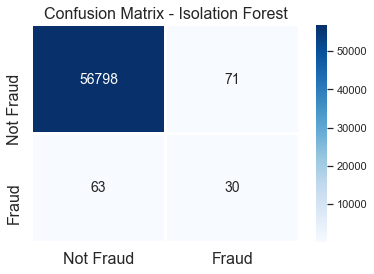

In [119]:
# Confusion Matrix
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - Isolation Forest', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - Isolation Forest: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### CatBoost Model

In [120]:
#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
VERBOSE_EVAL = 50 #Print out metric result

In [121]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [122]:
time_start = time.time()
clf.fit(train_df1[features], train_df1[target].values)
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

0:	total: 591ms	remaining: 4m 54s
50:	total: 24s	remaining: 3m 31s
100:	total: 46.9s	remaining: 3m 5s
150:	total: 1m 8s	remaining: 2m 39s
200:	total: 1m 30s	remaining: 2m 14s
250:	total: 1m 52s	remaining: 1m 51s
300:	total: 2m 13s	remaining: 1m 28s
350:	total: 2m 35s	remaining: 1m 5s
400:	total: 2m 56s	remaining: 43.6s
450:	total: 3m 18s	remaining: 21.5s
499:	total: 3m 39s	remaining: 0us
training time: 220.05 seconds.


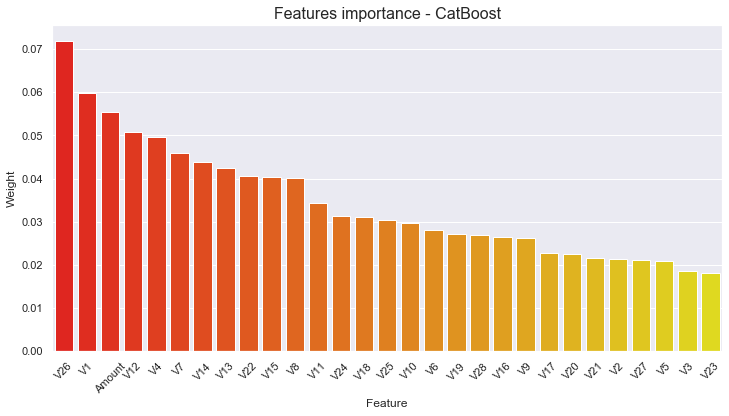

In [123]:
# Feature importance
tmp = pd.DataFrame({'Feature': features, 'Weight': clf.feature_importances_/clf.feature_importances_.sum()})
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - CatBoost',fontsize=16)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V26, V1, Amount, V12, V4, V7.

In [124]:
preds = clf.predict(valid_df[features])

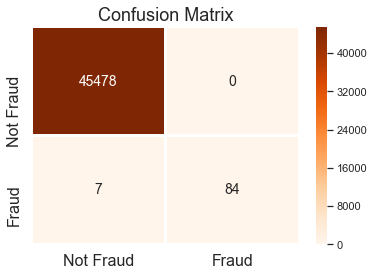

In [125]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [126]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

0.962

test dataset AUC - CatBoost:  0.909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.93      0.82      0.87        93

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



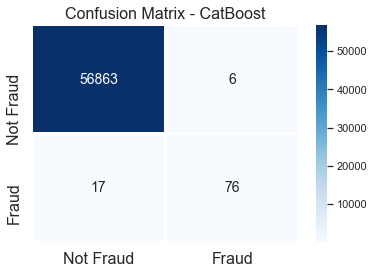

In [127]:
# Confusion Matrix
preds_tst = clf.predict(test_df[features])
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - CatBoost', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - CatBoost: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### XGBoost Model

In [128]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[features], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[features], valid_df[target].values)
dtest = xgb.DMatrix(test_df[features], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [129]:
time_start = time.time()
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

[0]	train-auc:0.87809	valid-auc:0.87347
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.91859	valid-auc:0.92285
[100]	train-auc:0.95076	valid-auc:0.94745
[150]	train-auc:0.97514	valid-auc:0.97269
[200]	train-auc:0.98881	valid-auc:0.98047
Stopping. Best iteration:
[191]	train-auc:0.98727	valid-auc:0.98119

training time: 27.27 seconds.


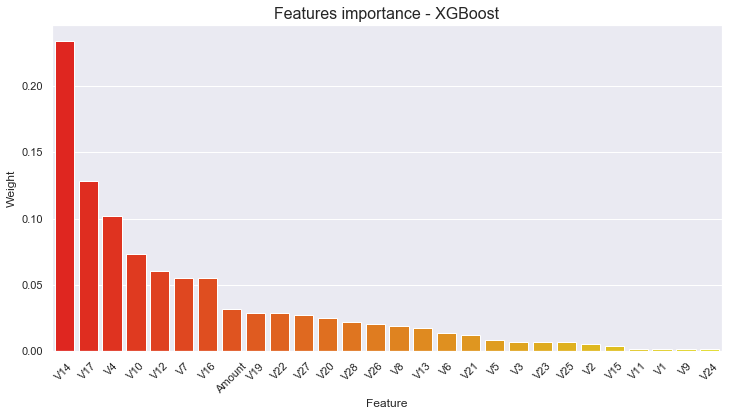

In [130]:
# Feature importance
tmp = pd.DataFrame({'Feature': list(model.get_score().keys()), 'Weight': list(model.get_score().values())})
tmp['Weight'] = tmp['Weight']/tmp['Weight'].sum()
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - XGBoost',fontsize=16)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V14, V17, V4, V10, V12, V7.

In [131]:
preds = model.predict(dvalid)
preds = np.where(preds>0.5,1,0)

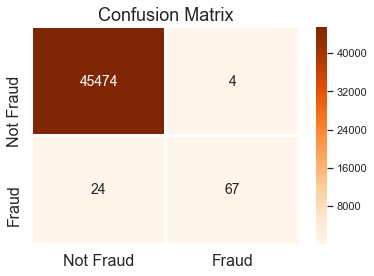

In [132]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [133]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

0.868

test dataset AUC - XGBoost:  0.876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.89      0.75      0.81        93

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



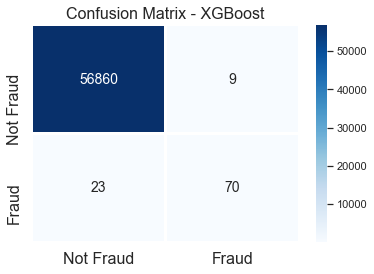

In [134]:
# Confusion Matrix
preds_tst = model.predict(dtest)
preds_tst = np.where(preds_tst>0.5,1,0)
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - XGBoost', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - XGBoost: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### LightGBM  Model

In [135]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [136]:
dtrain = lgb.Dataset(train_df[features].values, 
                     label=train_df[target].values,
                     feature_name=features)

dvalid = lgb.Dataset(valid_df[features].values,
                     label=valid_df[target].values,
                     feature_name=features)

In [137]:
time_start = time.time()
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.996852	valid's auc: 0.948993
[100]	train's auc: 0.997956	valid's auc: 0.918882
Early stopping, best iteration is:
[42]	train's auc: 0.996628	valid's auc: 0.952039
training time: 2.69 seconds.


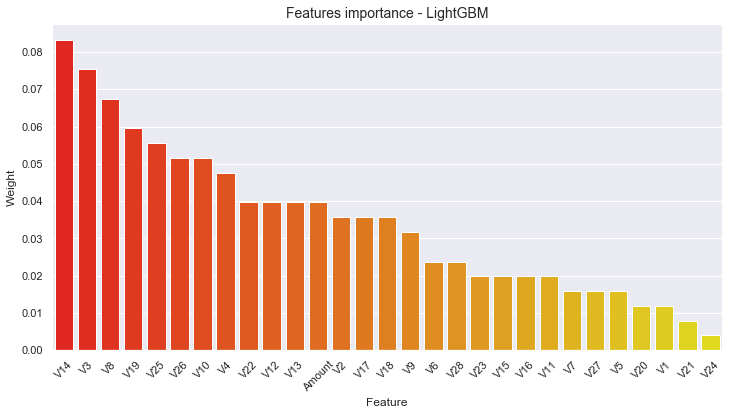

In [138]:
# Feature importance
tmp = pd.DataFrame({'Feature': model.feature_name(), 'Weight': model.feature_importance()/model.feature_importance().sum()})
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - LightGBM',fontsize=14)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V14, V3, V8, V9, V25, V26.

In [139]:
preds = model.predict(valid_df[features])
preds = np.where(preds>0.5,1,0)

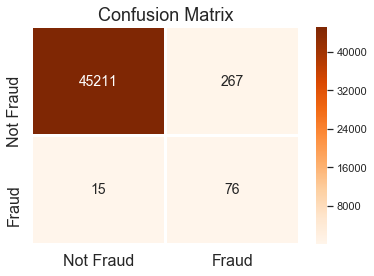

In [140]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [141]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

0.915

test dataset AUC - LightGBM:  0.927
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56869
           1       0.18      0.86      0.30        93

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.65     56962
weighted avg       1.00      0.99      1.00     56962



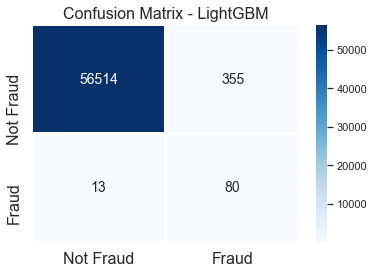

In [142]:
# Confusion Matrix
preds_tst = model.predict(test_df[features])
preds_tst = np.where(preds_tst>0.5,1,0)
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - LightGBM', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - LightGBM: ", round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### LightGBM with cross-validation

In [143]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
time_start = time.time()
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[features].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[features].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[features], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)     
print("training time: {} seconds.".format(round(time.time() - time_start,2)))

Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.969368	valid_1's auc: 0.959005
[100]	training's auc: 0.975429	valid_1's auc: 0.962374
Early stopping, best iteration is:
[72]	training's auc: 0.976338	valid_1's auc: 0.967243
Fold  1 AUC : 0.967243
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.976671	valid_1's auc: 0.952943
[100]	training's auc: 0.97382	valid_1's auc: 0.953293
[150]	training's auc: 0.974994	valid_1's auc: 0.959928
Early stopping, best iteration is:
[131]	training's auc: 0.974485	valid_1's auc: 0.961383
Fold  2 AUC : 0.961383
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.974069	valid_1's auc: 0.965136
Early stopping, best iteration is:
[15]	training's auc: 0.973419	valid_1's auc: 0.970677
Fold  3 AUC : 0.970677
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.970573	valid_1's auc: 0.976509
Early stopping, best iteration is:
[49]

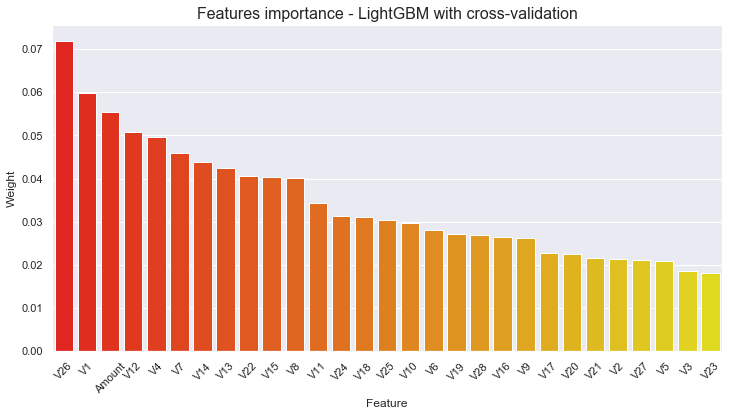

In [144]:
# Feature importance
feature_importance = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
tmp = pd.DataFrame({'Feature': feature_importance['feature'], \
                                                  'Weight': feature_importance['importance']/feature_importance['importance'].sum()})
tmp = tmp.sort_values(by='Weight',ascending=False)
plt.figure(figsize = (12,6))
plt.title('Features importance - LightGBM with cross-validation',fontsize=16)
s = sns.barplot(x='Feature',y='Weight',data=tmp, palette='autumn')
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()
# The most important features are V26, 1, Amount, V12, V4, V13.

In [ ]:
# # Splite dataset
# VALID_SIZE = 0.20 
# TEST_SIZE = 0.20 
# RANDOM_STATE = 2020
# train_df1, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)
# train_df, valid_df = train_test_split(train_df1, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

## Apply sampling techniques

In [176]:
rf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

### Under Sampling

In [177]:
clf = make_pipeline(NearMiss(version=2), rf)

In [178]:
clf.fit(train_df1[features], train_df1[target])

C:\Users\Vin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

C:\Users\Vin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

C:\Users\Vin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Pipeline(memory=None,
         steps=[('nearmiss',
                 NearMiss(n_jobs=1, n_neighbors=3, n_neighbors_ver3=3,
                          random_state=None, ratio=None, return_indices=False,
                          sampling_strategy='auto', version=2)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=4,
                                    

In [187]:
preds = clf.predict(valid_df[features])

In [188]:
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

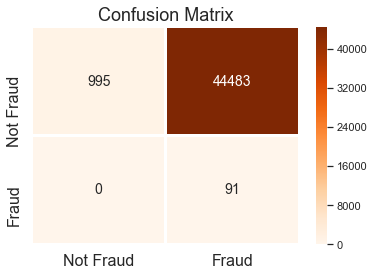

In [189]:
# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Oranges")
plt.title('Confusion Matrix', fontsize =18)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [190]:
# AUC
round(roc_auc_score(valid_df[target].values, preds),3)

0.511

test dataset AUC - RF w/ Under-Sampling:  0.505
              precision    recall  f1-score   support

           0       1.00      0.02      0.04     56869
           1       0.00      0.99      0.00        93

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.04     56962



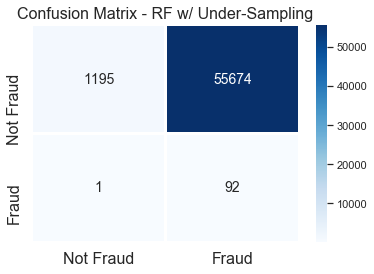

In [191]:
# Confusion Matrix
preds_tst = clf.predict(test_df[features])
cm = confusion_matrix(test_df[target].values, preds_tst)
# fig, ax1= plt.subplots(figsize=(8,8))
g = sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,annot_kws={'size':14},fmt='d',
            linewidths=2,linecolor="white", cmap="Blues")
plt.title('Confusion Matrix - RF w/ Under-Sampling', fontsize =16)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# AUC
print("test dataset AUC - RF w/ Under-Sampling: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# Classification Report
print(classification_report(test_df[target].values, preds_tst))

### Over Sampling

In [195]:
# clf = make_pipeline(SMOTE(random_state=RANDOM_STATE), rf)

In [196]:
# clf.fit(train_df1[features], train_df1[target])

In [ ]:
# preds = clf.predict(valid_df[features])

In [194]:
# # Confusion Matrix
# cm = confusion_matrix(valid_df[target].values, preds)
# # fig, ax1= plt.subplots(figsize=(8,8))
# g = sns.heatmap(cm,
#             xticklabels=['Not Fraud', 'Fraud'],
#             yticklabels=['Not Fraud', 'Fraud'],
#             annot=True,annot_kws={'size':14},fmt='d',
#             linewidths=2,linecolor="white", cmap="Oranges")
# plt.title('Confusion Matrix', fontsize =18)
# g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
# g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);

In [193]:
# # AUC
# round(roc_auc_score(valid_df[target].values, preds),3)

In [192]:
# # Confusion Matrix
# preds_tst = clf.predict(test_df[features])
# cm = confusion_matrix(test_df[target].values, preds_tst)
# # fig, ax1= plt.subplots(figsize=(8,8))
# g = sns.heatmap(cm,
#             xticklabels=['Not Fraud', 'Fraud'],
#             yticklabels=['Not Fraud', 'Fraud'],
#             annot=True,annot_kws={'size':14},fmt='d',
#             linewidths=2,linecolor="white", cmap="Blues")
# plt.title('Confusion Matrix - RF w/ Over-Sampling', fontsize =16)
# g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16);
# g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 16);
# # AUC
# print("test dataset AUC - RF w/ Over-Sampling: ",round(roc_auc_score(test_df[target].values, preds_tst),3))
# # Classification Report
# print(classification_report(test_df[target].values, preds_tst))

### Conclusions
I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. I then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For some models, I combine train and validation set to fit model and predict on test dataset.

I started with **RandomForrestClassifier**, for which we obtained an AUC scode of **0.903** when predicting the target for the test set.

I followed with an **AdaBoostClassifier** model, with lower AUC score **0.887** for prediction of the test set target values.

I then followed with an **CatBoostClassifier**, with the AUC score after training 500 iterations **0.909**.

I then experimented with a **XGBoost** model, the AUC score obtained was **0.876**.

I then presented the data to a **LightGBM** model. For the test set, the score obtained was **0.927**.

With the **SMOTE** technique on **RandomForrestClassifier**, I obtained an AUC score for the test prediction of **0.914**.

### Future Work